In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
# mpl.rcParams['pdf.fonttype'] = 42
import os
import h5py
import seaborn
# %matplotlib

In [13]:
cnn_continual_learning_lambda_40 = h5py.File('cnn_continual_learning_lambda_40.mat','r') ;
cnn_continual_learning_for_all_lambda = h5py.File('cnn_continual_learning_for_all_lambda.mat','r')

In [14]:
colors = [ [c/255 for c in [42, 176, 128] ], 
         [c/255 for c in [58, 110, 178] ],
        [c/255 for c in [202, 62, 114] ] ]

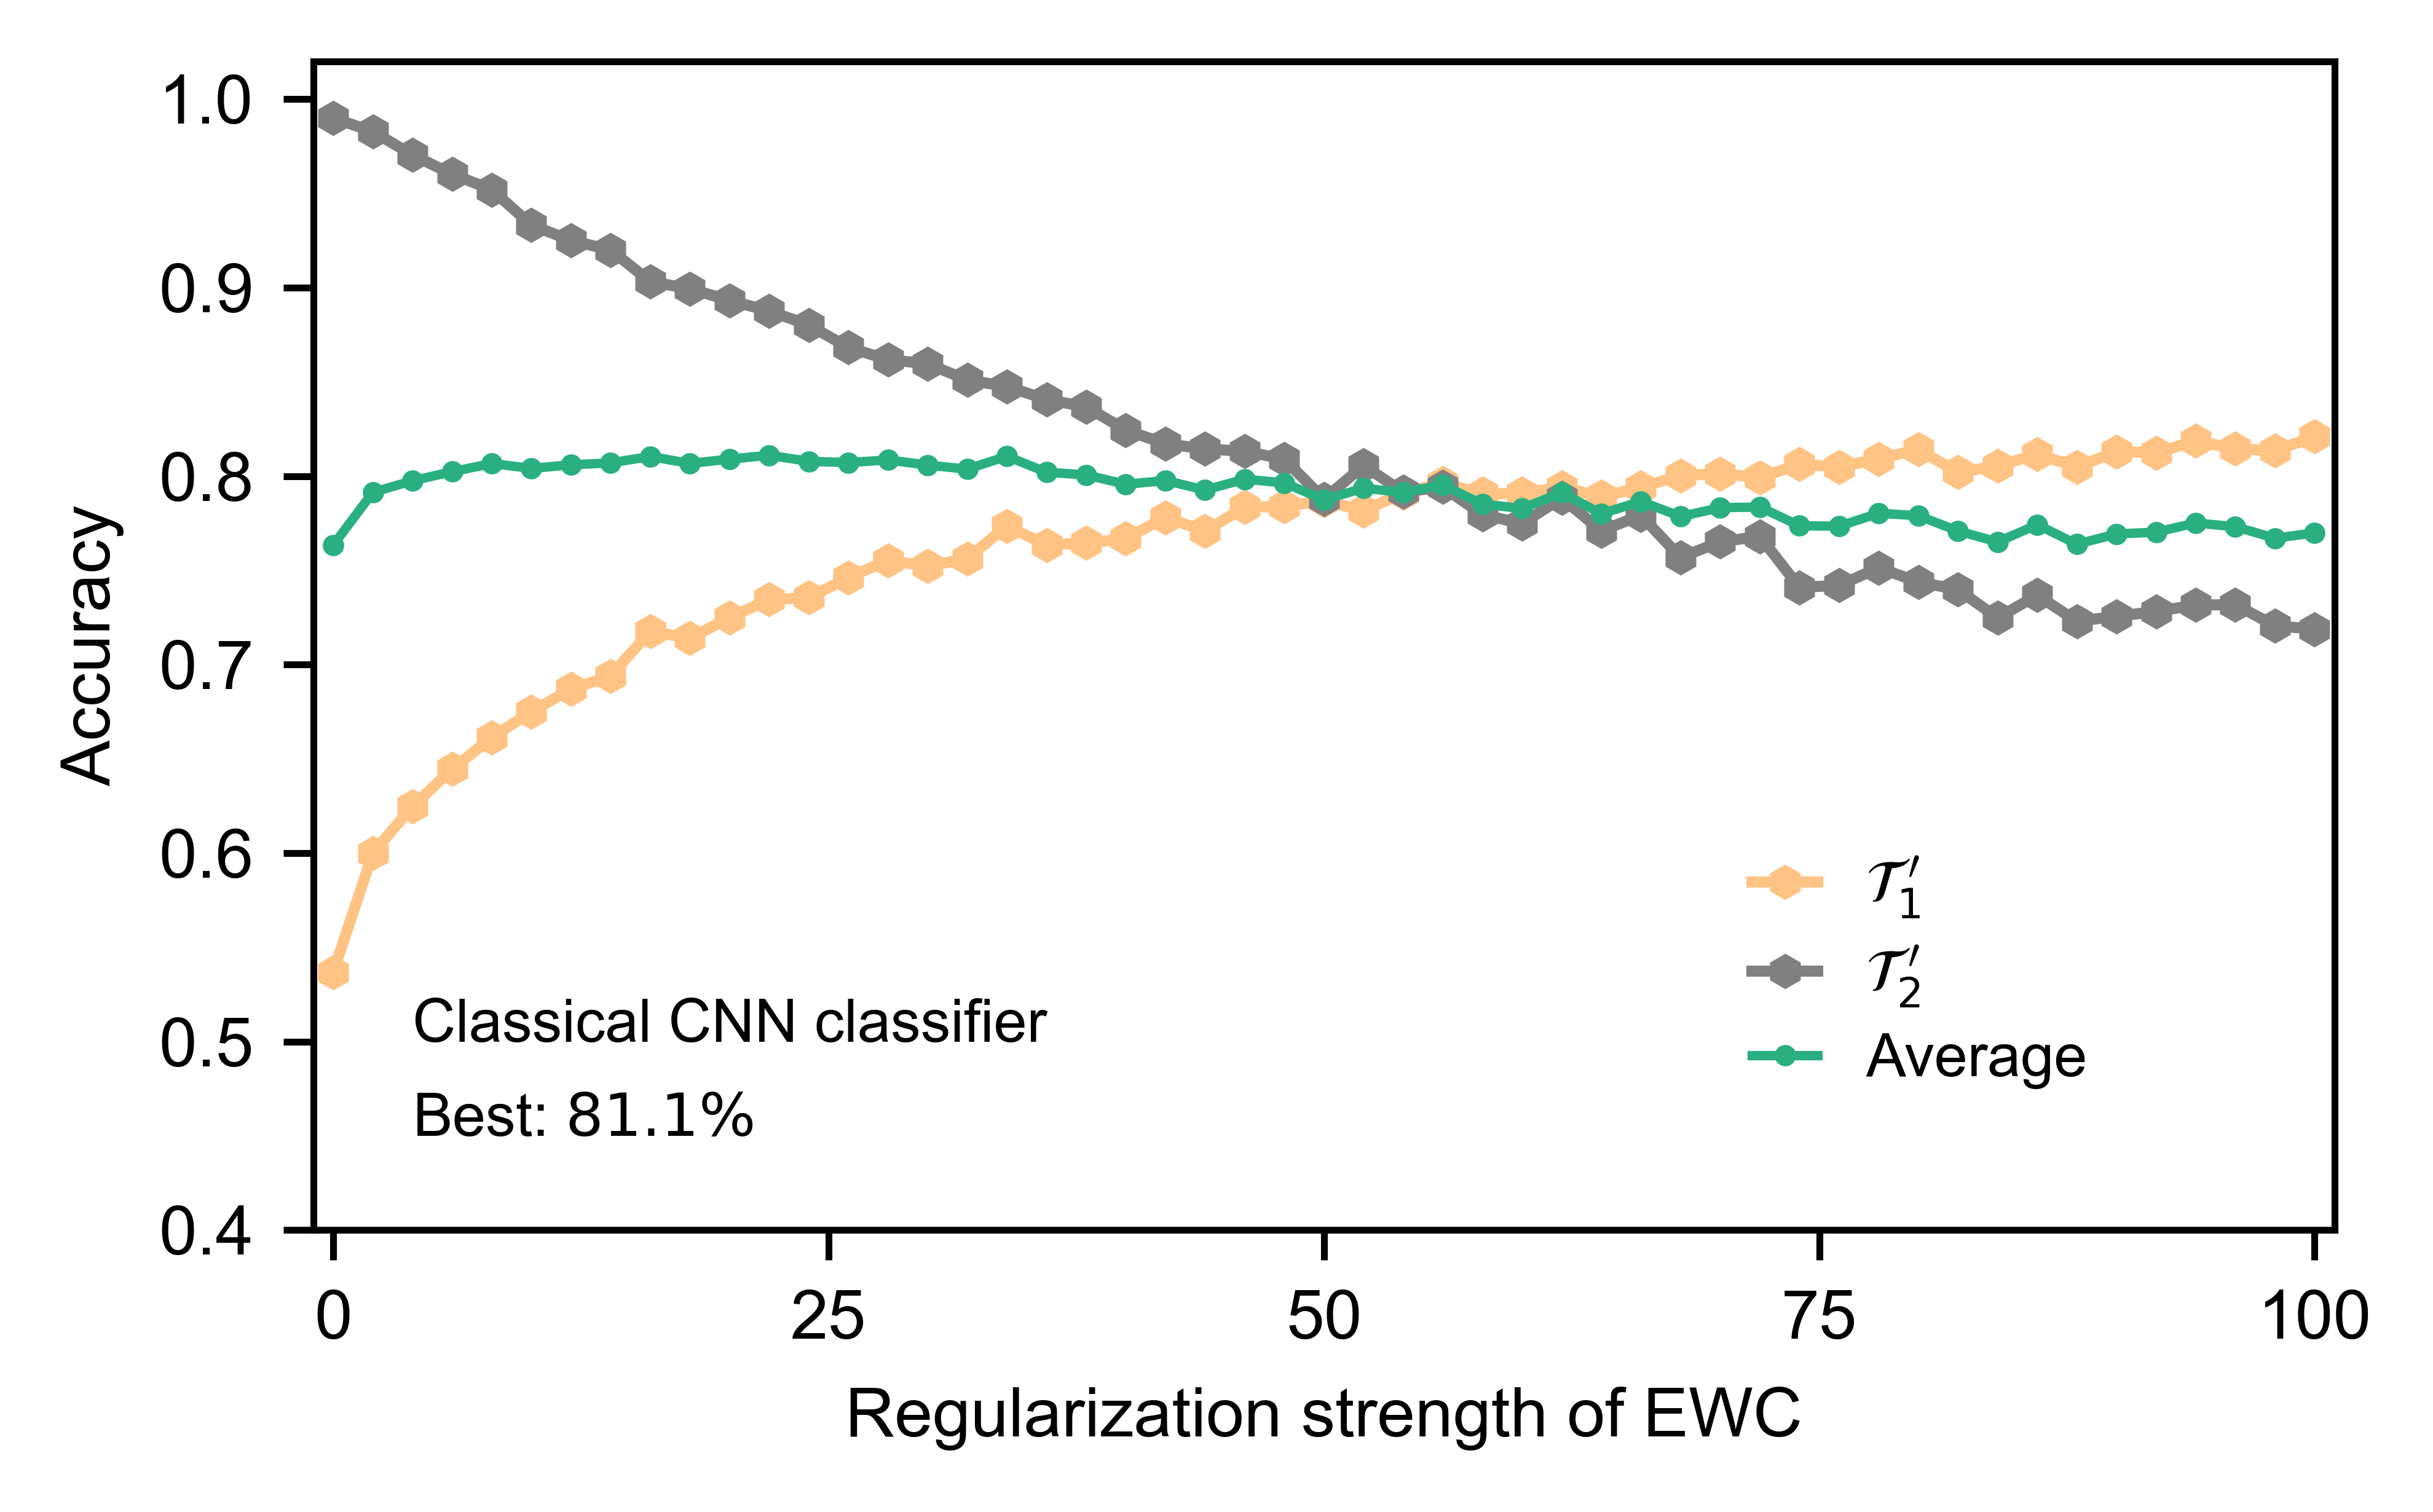

In [28]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 4, 2.5
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(dpi=1000)

lambda_list = cnn_continual_learning_for_all_lambda["lambda"][:]  ;
task_1 = cnn_continual_learning_for_all_lambda["task_1"][:]      ;
task_2 = cnn_continual_learning_for_all_lambda["task_2"][:]     ;
average = (task_1 +task_2)/2  ;

ax.set_ylabel('Accuracy', labelpad = 4)    
ax.set_xlabel(r'Regularization strength of EWC', labelpad = 4)
ax.set_xlim(-1, 101)
ax.set_xticks(np.array([ 0, 25, 50, 75, 100]), [ 0, 25, 50, 75, 100], position = (0, 0.00))

ax.set_ylim(0.4, 1.02)

ax.text(4, 0.50,  'Classical CNN classifier', fontsize = 7)
ax.text(4, 0.45,  r'Best: $81.1\%$', fontsize = 7)


ax.plot(lambda_list, task_1, color = [c/255 for c in [255, 195, 132] ], linestyle = "-", markevery = 1,
           marker = 'h', markersize = 3, linewidth=1.3, label = "$\mathcal{T}_1^{\;\prime}$" )

ax.plot(lambda_list, task_2, color = "grey", linestyle = "-", markevery = 1,
           marker = 'h', markersize = 3, linewidth=1.3, label = "$\mathcal{T}_2^{\;\prime}$" )

ax.plot(lambda_list, (task_1 +task_2)/2, color = colors[0], linestyle = "-", marker = '.', markersize = 3,
        markevery = 1, linewidth=1.1,  label = "Average"  )

ax.legend( loc=(0.7, 0.1), frameon=False, labelspacing=0.4, handlelength=1.1, fontsize = 7)

plt.tight_layout()
plt.show()

In [31]:
fig.savefig('CNN_learning.pdf', format='pdf', bbox_inches='tight', facecolor='None')